#  TP1 Stat 2 Oct 2020 
    Calligaro Nicolas

In [1]:
from math import *
import string
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

#### 1)
>Écrire une fonction nextpower qui calcule la première puissance de 2 supérieure ou égale à un
nombre n (on veillera à ce que le type de sortie soit un int, tester cela avec type par exemple).

In [33]:
def nextpower (x):
    for i in range (100) :
        j = pow (2,i)
        if (j >= x):
            return int(i)
        
    

In [34]:
nextpower (5)

3

#### 2)
>En partant du mot contenant toutes les lettres de l’alphabet, générer par une opération de slicing
la chaîne de caractère cfilorux et, de deux façons différentes, la chaîne de caractère vxz.

#### 3)
>Afficher le nombre $\pi$ avec 9 décimales après la virgule.

In [35]:
from decimal import *

getcontext().prec = 1
#Decimal(pi)
Decimal(1.02)

Decimal('1.020000000000000017763568394002504646778106689453125')

In [36]:
getcontext().prec = 7
Decimal(1) / Decimal(7)



Decimal('0.1428571')

In [37]:
getcontext().prec = 28
Decimal(1) / Decimal(7)

Decimal('0.1428571428571428571428571429')

#### 4)
>Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères
s="HelLo WorLd!!". On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [38]:
s="HelLo WorLd!!"
dico = {}
for i in s:
   
    dico[i] = dico.get(i, 0) + 1
dico



{'H': 1,
 'e': 1,
 'l': 1,
 'L': 2,
 'o': 2,
 ' ': 1,
 'W': 1,
 'r': 1,
 'd': 1,
 '!': 2}

#### 5)
>Écrire une fonction de codage par inversion de lettres (code de caesar) :\
chaque lettre d’un mot est remplacée par
une (et une seule) autre. On se servira de la fonction shuffle sur la chaîne de caractères contenant
tout l’alphabet pour associer les lettres codées.

In [39]:
def codage (s):
    my_list=[]
    for i in s:
        if i == 'z' :
            i = chr(96)
        elif i == 'Z':
            i = chr(64)
        my_list.append(chr(ord(i)+1))
    return my_list
    
    

In [40]:
a = codage ('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')


In [41]:
import random
mylist = [string.ascii_lowercase]
mylist = random.shuffle(mylist)
mylist


#### 6)
>Calculer
$2\overset{\infty}{\underset{k=1}{\prod}}\frac{4k^2}{4k^2-1}$
efficacement. On pourra utiliser time (ou %timeit) pour déterminer la rapidité
de votre méthode. Proposer une version avec et une version sans boucle

In [42]:
def mon_calcul (limite):
    k=1
    for i in range (1,limite):
        j = (4*pow(i,2))/(4*pow(i,2)-1)
        k = k*j
    k=2*k
    return k

In [43]:
def mon_calcul_numpy (limite):
    sol = np.arange(1, limite)
    sol = sol**2
    sol = 4*sol/(4*sol-1.)
    return 2*np.prod(sol)
    

In [44]:
limite = 100000
mon_calcul_numpy(limite)==mon_calcul(limite)

False

In [45]:
%%time
Decimal(mon_calcul_numpy (limite))

Wall time: 2 ms


Decimal('-0')

In [46]:
%%time
Decimal(mon_calcul(limite))

Wall time: 56.5 ms


Decimal('3.1415847995787071766926601412706077098846435546875')

#### 7)
>Créer une fonction quicksort qui trie une liste, en remplissant les éléments manquants dans le code
suivant. On testera que la fonction est correcte sur l’exemple quicksort([-2, 3, 5, 1, 3]) :



In [47]:
def quicksort(LaListe):
    """ a sorting algorithm with a pivot value"""
    if len(LaListe) <= 1:
        return LaListe
    else:
        pivot = LaListe.pop() #pivot = last element of the list ll
        
    less = []
    greater = []
    for x in LaListe:
        if x <= pivot:
            less.append(x)# append 'x' to 'less'
        else:
            greater.append(x)# append 'x' to 'greater'

    return (quicksort(less)+[pivot]+quicksort(greater)) # concatenate quicksort(less), pivot and quicksort(greater)

>Indices : la longueur d’une liste est donnée par len(l) deux listes peuvent être concaténées avec
l1 + l2 et l.pop() retire le dernier élément d’une liste.

In [48]:
a = quicksort([2,3,4,4,8,92,1,5,6,1,4,8,41,485,6987,3251,874])
a

[1, 1, 2, 3, 4, 4, 4, 5, 6, 8, 8, 41, 92, 485, 874, 3251, 6987]

#### 8)
>Sans utiliser de boucles for / while : créer une matrice \
$M\in\mathbb{R}^{5\times6} $\
aléatoire à coefficients uniformes
dans r1; 1s, puis remplacer une colonne sur deux par sa valeur moins le double de la colonne
suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

# Question 2

#### 1)
>Le terme régression a été introduit par Sir Francis Galton (cousin de C. Darwin) alors qu’il étudiait
la taille des individus au sein d’une descendance. Il tentait de comprendre pourquoi les grands individus
d’une population semblaient avoir des enfants d’une taille plus petite, plus proche de la taille moyenne
de la population ; d’où l’introduction du terme “régression”. Dans la suite on va s’intéresser aux données
récoltées par Galton.

In [124]:
import pandas as pd
raw_df = pd.read_csv('Galton.txt', sep = '\t')
pd.set_option('precision', 0)
raw_df
i=1

In [91]:
raw_df

,Family,Father,Mother,Gender,Height,Kids
0,1,199,170,M,185,4
1,1,199,170,F,175,4
2,1,199,170,F,175,4
3,1,199,170,F,175,4
4,2,191,168,M,186,4
...,...,...,...,...,...,...
893,136A,173,165,M,173,8
894,136A,173,165,M,171,8
895,136A,173,165,F,162,8
896,136A,173,165,F,161,8


In [4]:
inc_ratio = 2.54

In [71]:

if i : 
    i=0
    raw_df[["Father","Mother","Height"]] = raw_df[["Father","Mother","Height"]]*inc_ratio

    #raw_df["Mother"] = raw_df["Mother"]*inc_ratio
#raw_df["Height"] = raw_df["Height"]*inc_ratio

In [72]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Family  898 non-null    object
 1   Father  898 non-null    int32 
 2   Mother  898 non-null    int32 
 3   Gender  898 non-null    object
 4   Height  898 non-null    int32 
 5   Kids    898 non-null    int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 31.7+ KB


In [7]:
raw_df.isnull().any(axis=0)

Family    False
Father    False
Mother    False
Gender    False
Height    False
Kids      False
dtype: bool

In [8]:
df = raw_df.copy()

#### 3)
>Afficher sur un même graphe un estimateur de la densité (on utilisera une méthode à noyaux avec
un noyau gaussien) de la taille des pères en bleu, et de celles des mères en orange

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [10]:

#On créer les estimateurs père et mère

kde_F1 = gaussian_kde(df['Father'])
kde_M1 = gaussian_kde(df['Mother'])


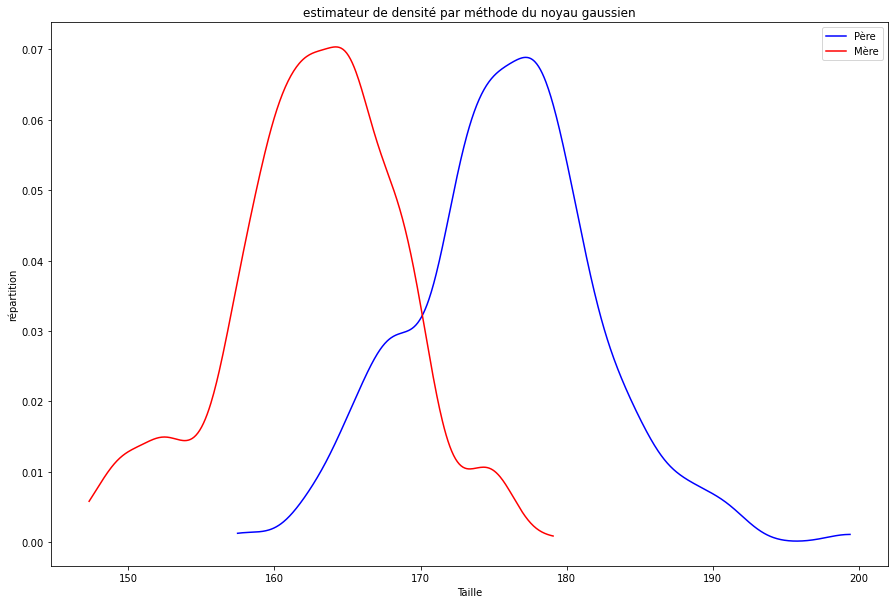

In [11]:
#on affiche l'estimateur avec les croix pour indiquer les val il faudrait faire un histo
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111)
#ax.plot(Father_size, np.zeros(Father_size.shape), 'b+')  # rug plot
#ax.plot(Mother_size, np.zeros(Mother_size.shape), 'r+')  # rug plot
père_dot = np.linspace(df["Father"].min(),df["Father"].max(), num=1000)
mère_dot = np.linspace(df["Mother"].min(),df["Mother"].max(), num=500)

ax.plot(père_dot,kde_F1(père_dot),'b-',label = "Père")
ax.plot(mère_dot,kde_M1(mère_dot),'r-',label = "Mère")

plt.title('estimateur de densité par méthode du noyau gaussien')
plt.xlabel("Taille")
plt.ylabel("répartition")
plt.legend()
plt.show()

In [78]:
#Création de prédiction par moindre carré
from sklearn import linear_model
reg = linear_model.LinearRegression()


père = df["Father"]
mère = df["Mother"]
reg.fit(df[["Mother"]],père)

print (reg.coef_,reg.intercept_)



[0.07887666] 163.01234062755645


#### 4)
>Afficher la taille du père en fonction de la taille de la mère pour les n observations figurant dans les
données. Ajouter la droite de prédiction obtenue par la méthode des moindres carrés (avec constante
et sans centrage/normalisation).

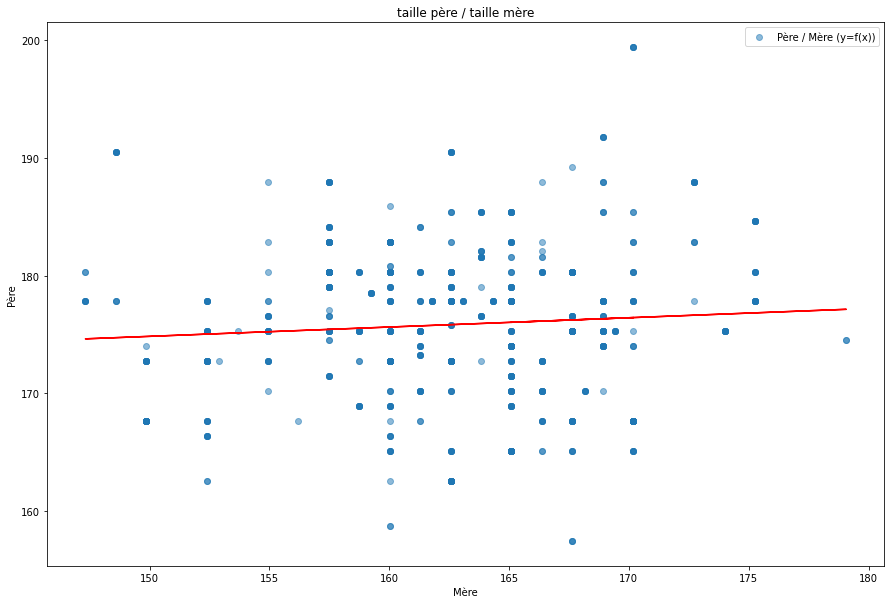

In [79]:
#Taille du père en fct de la mère
fig2 = plt.figure(figsize=(15, 10))

plt.scatter(df["Mother"],df["Father"], alpha=0.5,label = 'Père / Mère (y=f(x))')
plt.plot (mère,reg.predict(df[["Mother"]]),'r')
plt.title('taille père / taille mère')
plt.xlabel("Mère")
plt.ylabel("Père")
plt.legend()
plt.show()

#### 5)
>Affichage du nombre  d'enfant par famille dans un histogramme
>on va utiliser matplotlib.pyplot.hist()

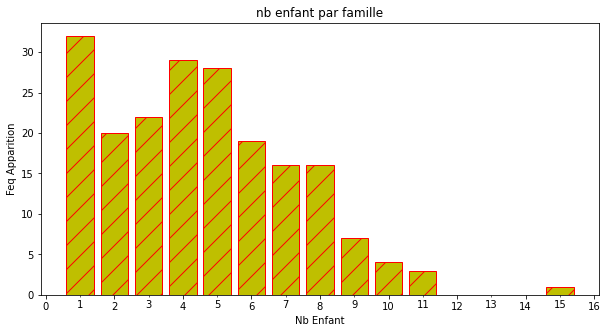

In [80]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig3 = plt.figure(figsize = (10,5))

Nb_Kids=df.groupby(['Family']).mean()["Kids"]

plt.hist(Nb_Kids, bins=range(1,Nb_Kids.max()+2), color='y',\
         edgecolor='r',align='left',rwidth = 0.8,hatch = '/')
#matplotlib.axes.Axes.set_xticks

plt.tick_params(axis = 'both', labelsize = 10)

axes = plt.gca() #on récupère l'objet axes qui correspond aux axes
axes.set_xticks(range(0,16),minor = True) #On force l'affichage des traits de 0 à 15
axes.xaxis.set_ticklabels(range(0,16), minor = True)#Ecrit les chiffres de 0 à 16 sur l'axe des x

plt.title('nb enfant par famille')
plt.xlabel("Nb Enfant")
plt.ylabel("Feq Apparition")

plt.show()

#### 6)
>Créer une colonne supplémentaire appelée 'MidParents' qui contient la taille du « parent moyen »,
et valant ('Father'+ 1.08 $\times$ 'Mother')/2.

In [133]:
df["MidParents"] = (df["Father"]+1.08*df["Mother"])/2
yi = df["Height"]
xi = df["MidParents"]
df

,Family,Father,Mother,Gender,Height,Kids,MidParents,y_i,x_i,yi,xi
0,1,199,170,M,186,4,192,186,192,186,192
1,1,199,170,F,176,4,192,176,192,176,192
2,1,199,170,F,175,4,192,175,192,175,192
3,1,199,170,F,175,4,192,175,192,175,192
4,2,192,169,M,187,4,187,187,187,187,187
...,...,...,...,...,...,...,...,...,...,...,...
893,136A,174,165,M,174,8,176,174,176,174,176
894,136A,174,165,M,172,8,176,172,176,172,176
895,136A,174,165,F,163,8,176,163,176,163,176
896,136A,174,165,F,161,8,176,161,176,161,176


#### 7)
>Estimer $\theta _0,\theta _1$, par $\hat{\theta}_0, \hat{\theta}_1 $
en utilisant la fonction LinearRegression de sklearn, puis vérifier
numériquement les formules vues en cours pour le cas unidimensionnel



<div style="text-align:center;">
$\hat{\theta}_0 = \bar{y}_n - \hat{\theta}_1\bar{x}_n,$                    
$\hat{\theta}_1 =\frac{\overset{n}{\underset{i=1}{\sum}}(x_i - \bar{x}_n)(y_i - \bar{y}_n)}{\overset{n}{\underset{i=1}{\sum}}(x_i - \bar{x}_n)^2}$
<div>

>On fera attention aux normalisations utilisées pour la variance qui peuvent changer selon les packages

In [113]:
#$\theta_0 et \theta_1$ de sklearn 
reg.fit(df[["MidParents"]],yi)
theta_1 = reg.coef_
theta_0 = reg.intercept_
#x barre : moyenne empirique : somme de tous les xi/n
xbarre = int((xi.sum()/xi.size))
ybarre = int(yi.mean())
#calcul de theta_0 et 1 numériquement
theta_1_num = (((xi-xbarre)*(yi-xbarre))//((xi-xbarre)**2)).sum()
theta_0_num = ybarre-theta_1_num*x_barre
print("Theta 0",theta_0 , theta_0_num)
print("Theta 1",theta_1[0] , theta_1_num)

Theta 0 56.83556243483079 -242731.0
Theta 1 0.6411903795908169 1388.0


Le résultat est faux car une série - un val donne une valeur abhérante

#### 8)
>Calculer et visualiser les valeurs prédites 
$\hat{y_i} = \hat\theta_0+\hat\theta_1x_1$ et les $y_i$ sur un même graphique. On affichera
de couleurs différentes les données correspondant aux garçons et celles correspondant aux filles.

In [153]:
model = linear_model.LinearRegression()
model.fit(df[["MidParents"]],yi)

y_chap = model.intercept_ + model.coef_*xi

xiM=df["MidParents"].loc[df["Gender"]=='M']
yiM=df["Height"].loc[df["Gender"]=='M']
y_chapM = model.intercept_ + model.coef_*xiM

xiF=df["MidParents"].loc[df["Gender"]=='F']
yiF=df["Height"].loc[df["Gender"]=='F']
y_chapF = model.intercept_ + model.coef_*xiF


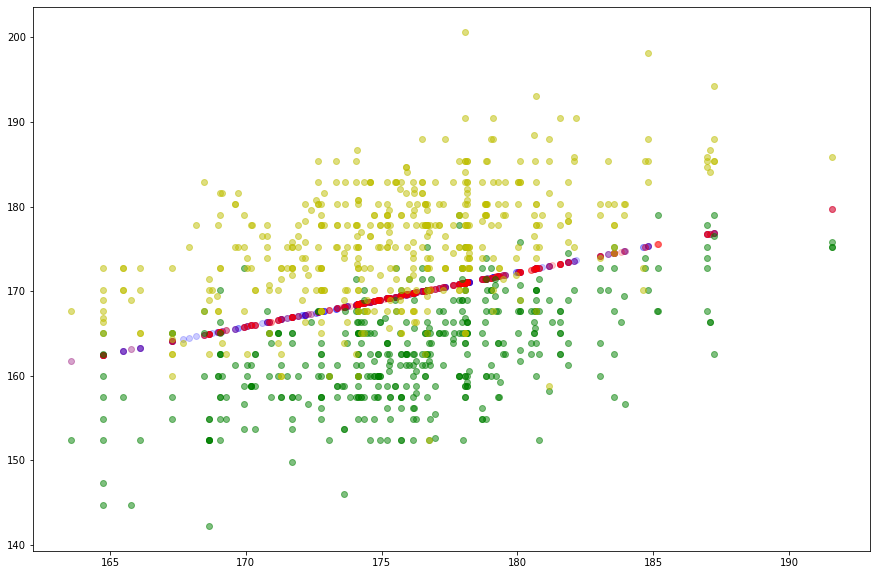

In [180]:
fig2 = plt.figure(figsize=(15, 10))

plt.scatter(xiM,y_chapM,c='b',alpha=0.2)
plt.scatter(xiF,y_chapF,c='r',alpha=0.2)

plt.scatter(xiF,yiF,c='g',alpha=0.5)
plt.scatter(xiM,yiM,c='y',alpha=0.5)

plt.show()

#### 9)
>Visualiser un estimateur de la densité des résidus 
$ ri = y_i - \hat{y}_i $. L’hypothèse de normalité est-elle
crédible selon vous ? Calculer ensuite $\alpha_g$ (resp. $\alpha_f$ ) les proportions de garçons (resp. de filles) dans
la population. On ajoutera ensuite sur le graphique précédent, les fonctions $\alpha_g p_g$ et $\alpha_f p_f$ , avec $p_g$(resp. $p_f$ ) les densités des résidus pour les garçons (resp. pour les filles).

<function matplotlib.pyplot.show(close=None, block=None)>

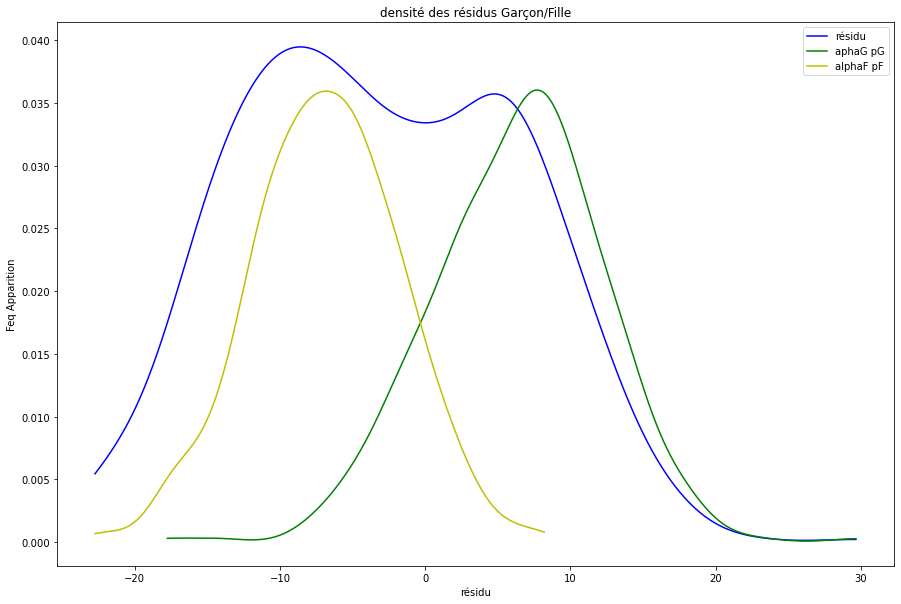

In [185]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ri = yi-y_chap
riM = yiM-y_chapM
riF = yiF-y_chapF

ag = df.loc[df["Gender"]=='M'].shape[0]/df.shape[0]
af = df.loc[df["Gender"]=='F'].shape[0]/df.shape[0]

kde_r = gaussian_kde(ri)
residu_dot = np.linspace(ri.min(),ri.max(), num=1000)
ax.plot(residu_dot,kde_r(residuM_dot),'b-',label = "résidu")

kde_rM = gaussian_kde(riM)
residuM_dot = np.linspace(riM.min(),riM.max(), num=1000)
ax.plot(residuM_dot,ag*kde_rM(residuM_dot),'g-',label = "aphaG pG")

kde_rF = gaussian_kde(riF)
residuF_dot = np.linspace(riF.min(),riF.max(), num=1000)
ax.plot(residuF_dot,af*kde_rF(residuF_dot),'y-',label = "alphaF pF")

plt.title('densité des résidus Garçon/Fille')
plt.xlabel("résidu")
plt.ylabel("Feq Apparition")
plt.legend()
plt.show

In [182]:
ag = df.loc[df["Gender"]=='M'].shape[0]/df.shape[0]
af = df.loc[df["Gender"]=='F'].shape[0]/df.shape[0]
ag,af,ag+af

(0.5178173719376392, 0.4821826280623608, 1.0)

898